In [1]:
sce <- readRDS('/tmp/work/RCproject/GEO_singlecellexperiment.rds')

In [11]:
sce

class: SingleCellExperiment 
dim: 12165 450 
metadata(0):
assays(3): counts logcounts scalelogcounts
rownames(12165): A1CF A2M ... ZZEF1 ZZZ3
rowData names(5): SYMBOL ENTREZID ENSEMBL gene_id gene_name
colnames(450): GSM3899156_GSE133057 GSM3899157_GSE133057 ...
  GSM6390461_GSE209746 GSM6390462_GSE209746
colData names(6): Response TRG ... Platform batch
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [ ]:
assay

In [12]:
colData(sce)

DataFrame with 450 rows and 6 columns
                        Response         TRG     therapy   Treatment
                     <character> <character> <character> <character>
GSM3899156_GSE133057         yes         1,2         CRT         pre
GSM3899157_GSE133057     partial           3         CRT         pre
GSM3899158_GSE133057         yes         1,2         CRT         pre
GSM3899159_GSE133057     partial           3         CRT         pre
GSM3899160_GSE133057         yes         1,2         CRT         pre
...                          ...         ...         ...         ...
GSM6390458_GSE209746          no     unknown         CRT         pre
GSM6390459_GSE209746          no     unknown         CRT         pre
GSM6390460_GSE209746          no     unknown         CRT         pre
GSM6390461_GSE209746         yes     unknown         CRT         pre
GSM6390462_GSE209746         yes     unknown         CRT         pre
                        Platform       batch
                    

In [87]:
quantile_normalization <- function(sce){
  
  counts <- counts(sce)
  
  ordered_results <- apply(counts, 2, function(x) {
    # Get the order of the indices from highest to lowest
    ordered_indices <- order(x, decreasing = TRUE)
    # Return a list of ordered values and the original indices
    list(ordered_values = x[ordered_indices], original_indices = ordered_indices)
  })
  
  ordered_matrix <- matrix(
    unlist(lapply(ordered_results, function(x) x$ordered_values)),
    nrow = nrow(counts),
    byrow = FALSE
  )
  
  # Compute the average for each row
  row_averages <- rowMeans(ordered_matrix)
  
  # Replace each row's values with the row's average
  average_matrix <- matrix(rep(row_averages, ncol(ordered_matrix)),
                           nrow = nrow(ordered_matrix), byrow = FALSE)
  
  # Reconstruct original matrix based on saved indices
  reconstructed_matrix <- matrix(NA, nrow = nrow(counts), ncol = ncol(counts))
  
  for (i in 1:ncol(counts)) {
    original_indices <- ordered_results[[i]]$original_indices
    reconstructed_matrix[original_indices, i] <- average_matrix[, i]
  }
  
  colnames(reconstructed_matrix) <- colnames(counts)
  rownames(reconstructed_matrix) <- rownames(counts)
  
  assay(sce, 'quantile_norm') <- as.matrix(reconstructed_matrix)             
  
  return(sce)
}

In [88]:
sce <- quantile_normalization(sce)

In [89]:
test <- assay(sce, 'quantile_norm')

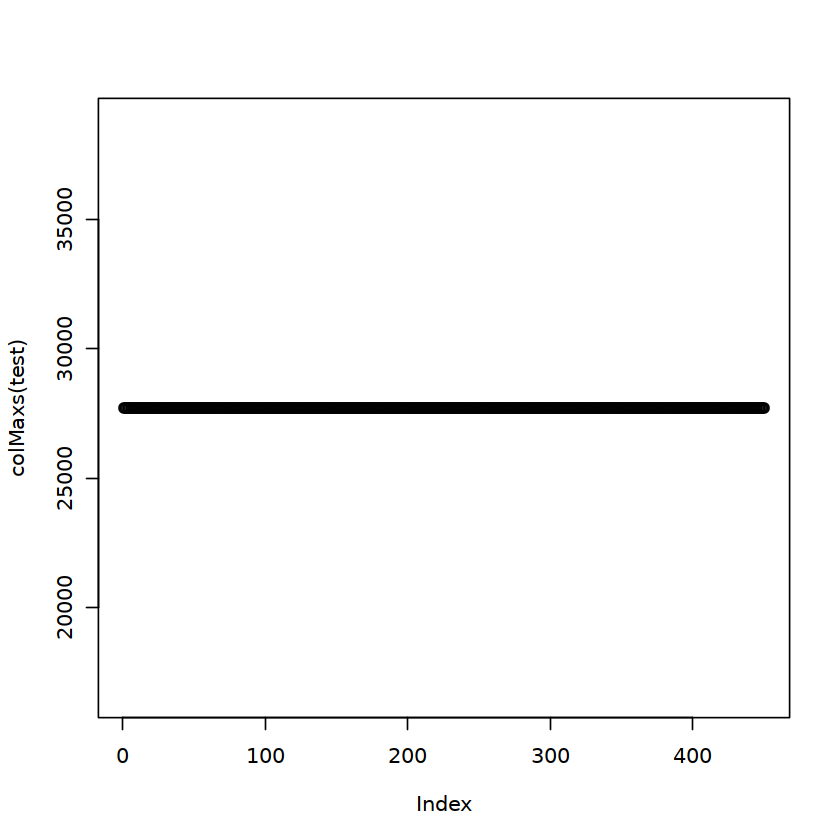

In [98]:
plot(colMaxs(test))

In [92]:
expression_matrix <- test

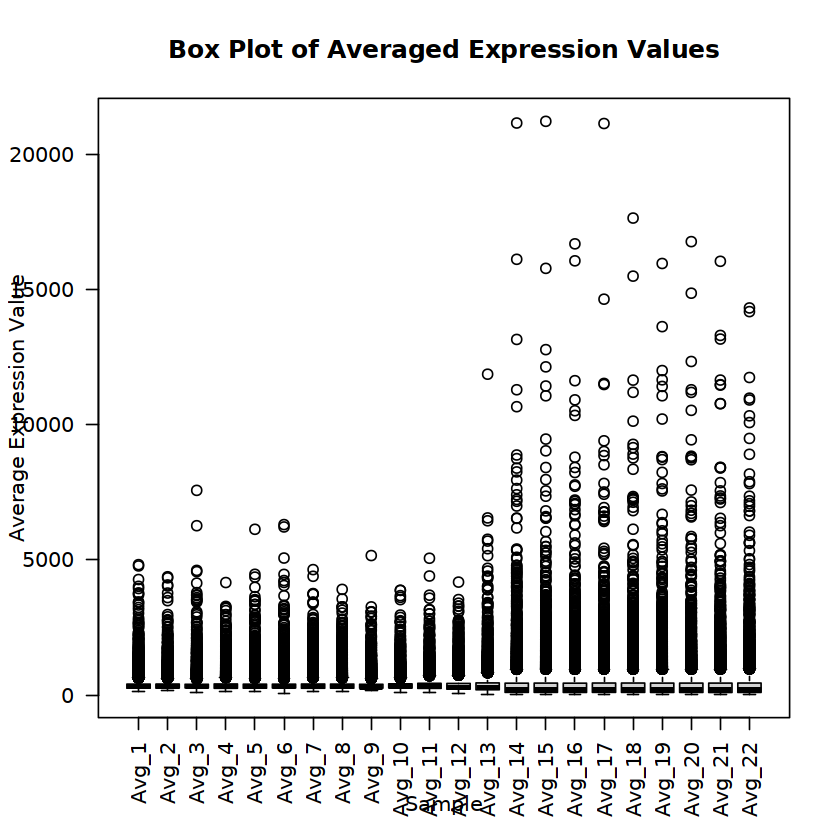

In [94]:
# Example: Create a matrix of random values (genes x samples)
set.seed(123)
expression_matrix <- test

# Step 1: Average every 20 columns together
n_cols <- ncol(expression_matrix)
new_n_cols <- n_cols / 20

# Create the reduced matrix by averaging
reduced_matrix <- matrix(NA, nrow = nrow(expression_matrix), ncol = new_n_cols)

for (i in 1:new_n_cols) {
  cols_to_average <- ((i - 1) * 20 + 1):(i * 20)
  reduced_matrix[, i] <- rowMeans(expression_matrix[, cols_to_average], na.rm = TRUE)
}

# Set column names for the reduced matrix
colnames(reduced_matrix) <- paste0("Avg_", 1:new_n_cols)

# Step 2: Convert to data frame for plotting
reduced_df <- as.data.frame(reduced_matrix)

# Step 3: Reshape data frame to long format using base R
# The `stack` function can be used to reshape the data frame
reduced_long <- stack(reduced_df)
names(reduced_long) <- c("Expression", "Sample")

# Create the box plot using base R
boxplot(Expression ~ Sample, data = reduced_long,
        main = "Box Plot of Averaged Expression Values",
        xlab = "Sample",
        ylab = "Average Expression Value",
        las = 2)  # las=2 makes x-axis labels vertical

In [100]:
colMaxs(reduced_matrix)

Avg_1     Avg_2     Avg_3     Avg_4     Avg_5     Avg_6     Avg_7     Avg_8 
 4825.588  4377.359  7573.043  4163.726  6133.200  6307.309  4641.839  3910.611 
    Avg_9    Avg_10    Avg_11    Avg_12    Avg_13    Avg_14    Avg_15    Avg_16 
 5161.845  3877.091  5062.402  4179.546 11869.428 21159.157 21221.883 16690.278 
   Avg_17    Avg_18    Avg_19    Avg_20    Avg_21    Avg_22 
21140.996 17643.974 15964.047 16772.425 16045.110 14319.250

In [111]:
max(rowMeans(test[,1:20]))
colMaxs(test[,1:20])

max(rowMeans(test[,380:400]))
colMaxs(test[,380:400])

[1] 4825.588

GSM3899156_GSE133057 GSM3899157_GSE133057 GSM3899158_GSE133057 
             27715.4              27715.4              27715.4 
GSM3899159_GSE133057 GSM3899160_GSE133057 GSM3899161_GSE133057 
             27715.4              27715.4              27715.4 
GSM3899162_GSE133057 GSM3899163_GSE133057 GSM3899164_GSE133057 
             27715.4              27715.4              27715.4 
GSM3899165_GSE133057 GSM3899166_GSE133057 GSM3899167_GSE133057 
             27715.4              27715.4              27715.4 
GSM3899168_GSE133057 GSM3899169_GSE133057 GSM3899170_GSE133057 
             27715.4              27715.4              27715.4 
GSM3899171_GSE133057 GSM3899172_GSE133057 GSM3899173_GSE133057 
             27715.4              27715.4              27715.4 
GSM3899174_GSE133057 GSM3899175_GSE133057 
             27715.4              27715.4

[1] 17293.52

GSM6390380_GSE209746 GSM6390381_GSE209746 GSM6390382_GSE209746 
             27715.4              27715.4              27715.4 
GSM6390384_GSE209746 GSM6390385_GSE209746 GSM6390386_GSE209746 
             27715.4              27715.4              27715.4 
GSM6390387_GSE209746 GSM6390389_GSE209746 GSM6390392_GSE209746 
             27715.4              27715.4              27715.4 
GSM6390394_GSE209746 GSM6390395_GSE209746 GSM6390396_GSE209746 
             27715.4              27715.4              27715.4 
GSM6390397_GSE209746 GSM6390399_GSE209746 GSM6390400_GSE209746 
             27715.4              27715.4              27715.4 
GSM6390401_GSE209746 GSM6390402_GSE209746 GSM6390403_GSE209746 
             27715.4              27715.4              27715.4 
GSM6390404_GSE209746 GSM6390405_GSE209746 GSM6390406_GSE209746 
             27715.4              27715.4              27715.4

In [110]:
max(rowMeans(test[,1:20]))

[1] 4825.588

In [3]:
library('singleCellTK')
sce <- readRDS('/tmp/work/RCproject/GEO_singlecellexperiment.rds')
exportSCEtoAnnData(sce,useAssay = "counts",outputDir = "./",prefix = "sample",overwrite = TRUE,compression = c("None"))

class: SingleCellExperiment 
dim: 12165 450 
metadata(0):
assays(3): counts logcounts scalelogcounts
rownames(12165): A1CF A2M ... ZZEF1 ZZZ3
rowData names(5): SYMBOL ENTREZID ENSEMBL gene_id gene_name
colnames(450): GSM3899156_GSE133057 GSM3899157_GSE133057 ...
  GSM6390461_GSE209746 GSM6390462_GSE209746
colData names(6): Response TRG ... Platform batch
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [4]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("singleCellTK")

Bioconductor version '3.18' is out-of-date; the current release version '3.19'
  is available with R version '4.4'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.25), R 4.3.1 (2023-06-16)

Installing package(s) 'singleCellTK'

also installing the dependencies ‘tensorA’, ‘distributional’, ‘posterior’, ‘inline’, ‘loo’, ‘QuickJSR’, ‘rstan’, ‘rstantools’, ‘StanHeaders’, ‘checkmate’, ‘bdsmatrix’, ‘densEstBayes’, ‘foreign’, ‘htmlTable’, ‘Formula’, ‘DEoptimR’, ‘mnormt’, ‘TH.data’, ‘sandwich’, ‘org.Hs.eg.db’, ‘ragg’, ‘startupmsg’, ‘sfsmisc’, ‘bbmle’, ‘reldist’, ‘Hmisc’, ‘robustbase’, ‘sn’, ‘plotrix’, ‘multcomp’, ‘assertthat’, ‘interactiveDisplayBase’, ‘ResidualMatrix’, ‘AnnotationFilter’, ‘ProtGenerics’, ‘maps’, ‘gridGraphics’, ‘yulab.utils’, ‘aplot’, ‘ggfun’, ‘tidyt